In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(666)
# x = np.random.uniform(-3, 3, size=100)
# x是随机的，排序后绘图更方便
x = np.sort(np.random.uniform(-3, 3, size=100))
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.5044796292455209

In [4]:
y_predict= lin_reg.predict(X)

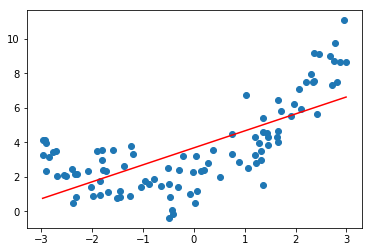

In [5]:
plt.scatter(X,y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()
# 其实对于直线可以不需要重新排序
#plt.plot(X, y_predict,color='r')
# 另一种方法就是随机生成x后立即进行排序，即
# x = np.sort(np.random.uniform(-3, 3, size=100))

In [6]:
def PolynomialRegression(degree):
    poly_reg = Pipeline([
        ('ploynomial_features', PolynomialFeatures(degree=degree)),
        ('standard_scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ])
    return poly_reg

In [7]:
poly_reg2 = PolynomialRegression(2)
poly_reg2.fit(X, y)

Pipeline(memory=None,
         steps=[('ploynomial_features',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [8]:
y_predict2 = poly_reg2.predict(X)

In [9]:
mean_squared_error(y, y_predict2)

1.0937987739636454

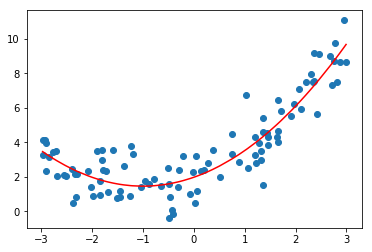

In [10]:
plt.scatter(X,y)
#plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.plot(x, y_predict2,color='r')
plt.show()

In [11]:
poly_reg10 = PolynomialRegression(10)
poly_reg10.fit(X, y)
y_predict10 = poly_reg10.predict(X)
mean_squared_error(y, y_predict10)

0.9530293790558845

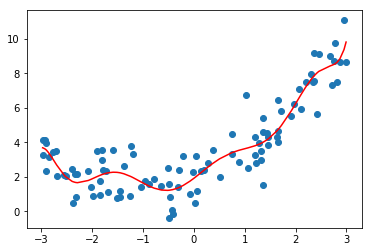

In [12]:
plt.scatter(X,y)
plt.plot(x, y_predict10,color='r')
plt.show()

In [14]:
poly_reg100 = PolynomialRegression(100)
poly_reg100.fit(X, y)
y_predict100 = poly_reg100.predict(X)
mean_squared_error(y, y_predict100)

0.5860800445986422

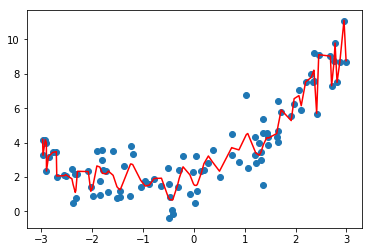

In [15]:
plt.scatter(X,y)
plt.plot(x, y_predict100,color='r')
plt.show()

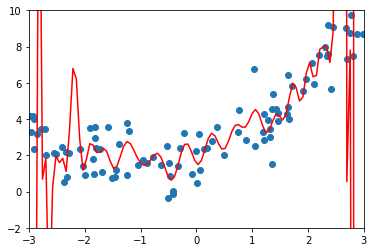

In [19]:
x_plot = np.linspace(-3, 3, 100)
X_plot = x_plot.reshape(-1,1)
y_plot = poly_reg100.predict(X_plot)
plt.scatter(X,y)
plt.plot(X_plot, y_plot,color='r')
plt.axis([-3,3,-2,10])
plt.show()